# **Importing required libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing required libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression  # Importing Logistic regression classifier
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score
# Importing LightGBM library
import lightgbm as lgb  # Light Gradient Boosting Machine library

# **Importing our dataset**

In [ ]:
# Reading the CSV file 'ipl.csv' and storing the data in a DataFrame called 'data'
data = pd.read_csv('/content/drive/MyDrive/ipl analysis-20240221T085253Z-001/ipl analysis/IPL Matches 2008-2020.csv')

# Displaying the first 5 rows of the dataset
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# Displaying the last 5 rows of the dataset
data.tail(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


# **Understanding our data**

In [ ]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (816, 17)


In [ ]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
# Displaying the columns in our dataset
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

### **Column Description**

- 'id': Unique identifier for each match.

- 'city': City where the match was played.

- 'date': Date of the match.

- 'player_of_match': Name of the player who was awarded "Player of the Match."

- 'venue': Stadium or venue where the match was played.

- 'neutral_venue': Binary indicator (0 or 1) indicating if the match was played on a neutral venue (1) or not (0).

- 'team1': Name of the first team participating in the match.

- 'team2': Name of the second team participating in the match.

- 'toss_winner': Name of the team that won the toss.

- 'toss_decision': Decision taken by the toss-winning team (either 'field' or 'bat').

- 'winner': Name of the team that won the match.

- 'result': The result of the match (e.g., 'runs', 'wickets', 'tie', etc.).

- 'result_margin': The margin by which the winning team won the match (e.g., runs or wickets).

- 'eliminator': Binary indicator (0 or 1) indicating if the match was decided by an eliminator (1) or not (0).

- 'method': The method used to decide the match (e.g., Duckworth-Lewis, etc.).

- 'umpire1': Name of the first on-field umpire.

- 'umpire2': Name of the second on-field umpire.

In [ ]:
# Get unique values in the 'team1' column
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Get unique values in the 'team2' column
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Get unique values in the 'winner' column
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Get unique values in the 'toss_winner' column
data['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

The above code is used to standardize and clean up the team names in the dataset. There are inconsistencies in the team names, and some teams have multiple variations in their names, such as "Rising Pune Supergiant" as "Rising Pune Supergiants," "Sunrisers Hyderabad" as "Deccan Chargers" and "Delhi Capitals" as "Delhi Daredevils".

By performing these replacements, we ensure that all team names are consistent and represented with the correct name throughout the dataset. This is important because when building models or performing data analysis, having consistent and clean data is crucial for accurate and meaningful results.

In [ ]:
# To show statistical summary of the columns of our data
data.describe(include ='all')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
count,8.160000e+02,803,816,812,816,816.000000,816,816,816,816,812,812,799.000000,812,19,816,816
unique,NaN,32,596,233,36,NaN,11,11,11,2,11,3,NaN,2,1,48,47
top,NaN,Mumbai,2014-05-11,AB de Villiers,Eden Gardens,NaN,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,N,D/L,HDPK Dharmasena,S Ravi
freq,NaN,101,2,23,77,NaN,108,106,106,496,120,435,NaN,799,19,78,84
mean,7.563496e+05,NaN,NaN,NaN,NaN,0.094363,NaN,NaN,NaN,NaN,NaN,NaN,17.321652,NaN,NaN,NaN,NaN
std,3.058943e+05,NaN,NaN,NaN,NaN,0.292512,NaN,NaN,NaN,NaN,NaN,NaN,22.068427,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,5.012278e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
50%,7.292980e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN
75%,1.082626e+06,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.500000,NaN,NaN,NaN,NaN


# **Checking NULL Values**

In [ ]:
# To count the null values
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
# Fill missing values in 'city' column with 'Unknown'
data['city'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing values in 'player_of_match', 'result', and 'eliminator' columns with 'Not Available'
cols_to_fill = ['player_of_match', 'result', 'eliminator']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [ ]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

In [ ]:
# To drop the unwanted columns
data.drop(['id','method'],axis=1,inplace=True)

In [ ]:
# Drop rows with missing values in the 'winner' column
data.dropna(subset=['winner'], inplace=True)


In [ ]:
# To count the null values
data.isnull().sum()

city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
# Checking the shape of our data after handling null values
data.shape

(812, 15)

In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column and create a new 'season' column
data['season'] = pd.DatetimeIndex(data['date']).year

In [ ]:
# displaying our data
data.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


# **EDA**

In [ ]:
# Get the unique venues present in the 'venue' column
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

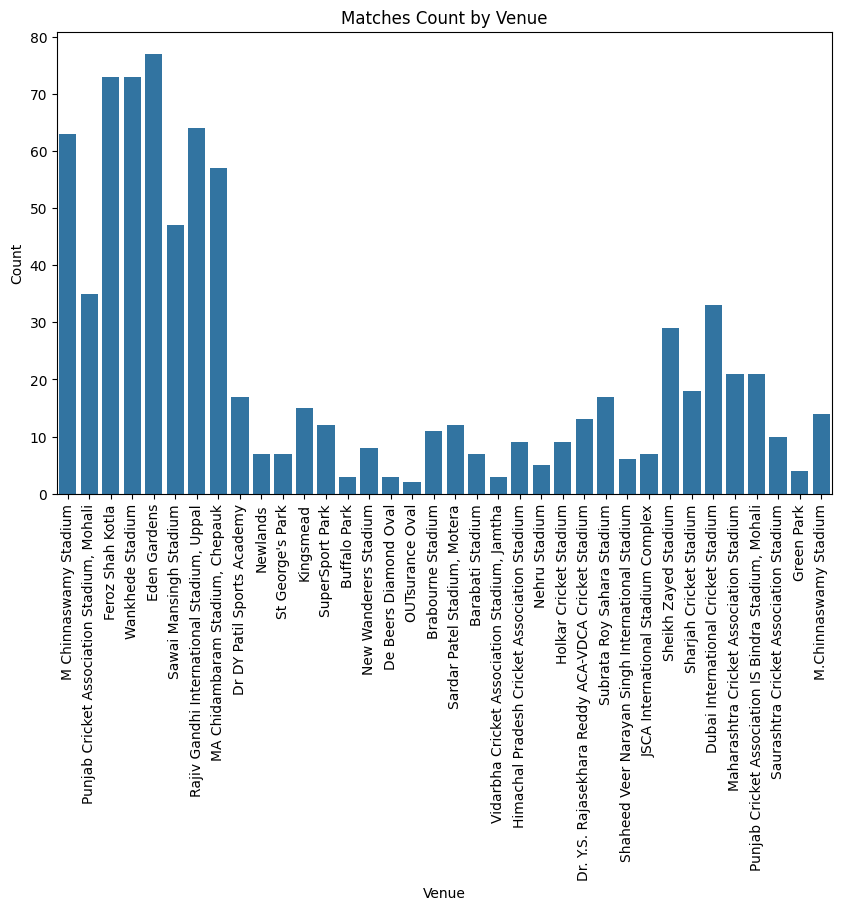

In [ ]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='venue', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by Venue')

# Display the plot
plt.show()

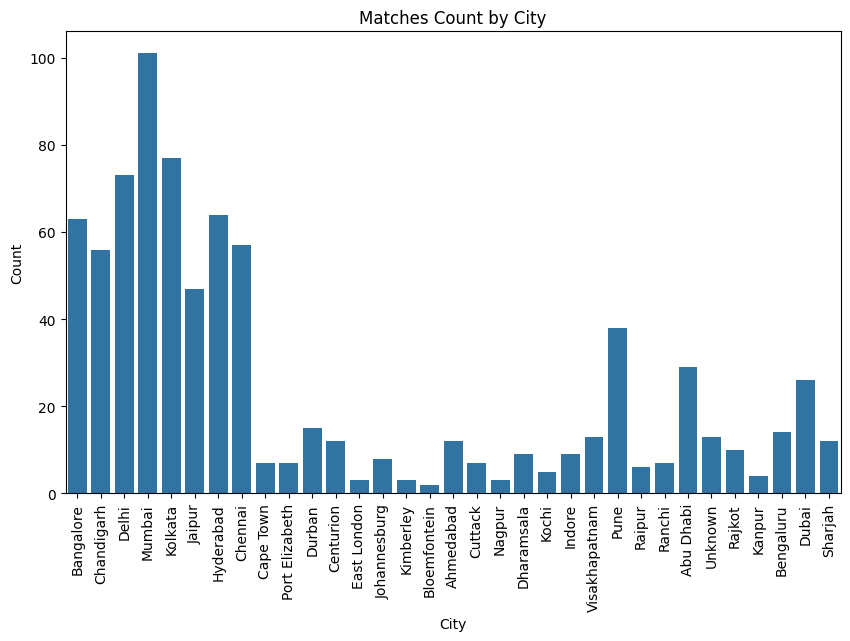

In [ ]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played in each city
# The 'x' parameter is set to 'city', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='city', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('City')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by City')

# Display the plot
plt.show()

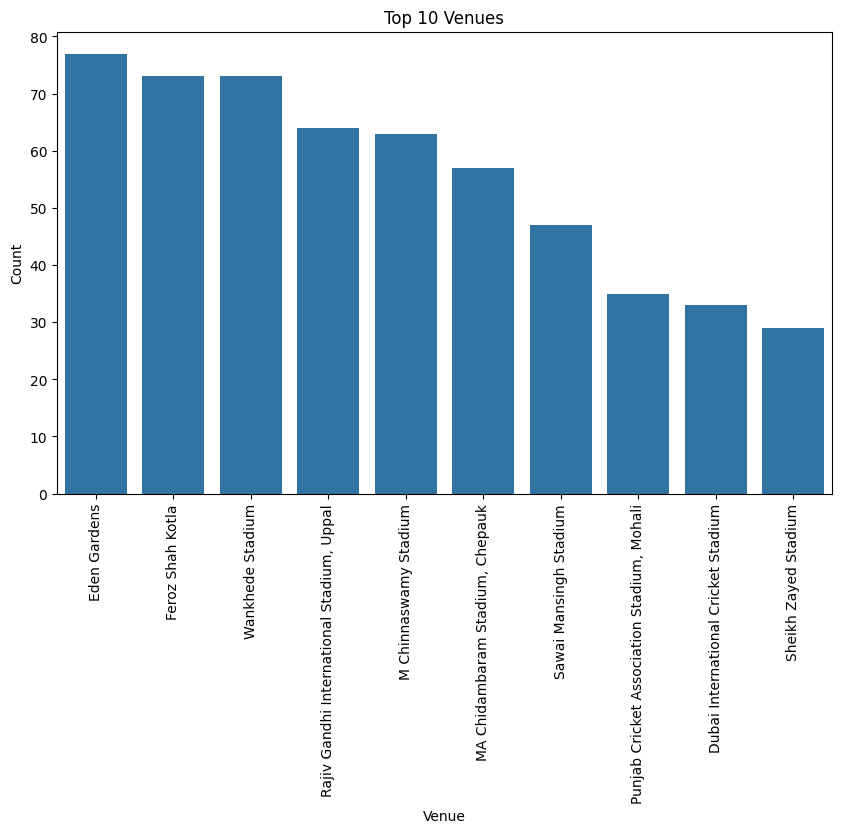

In [ ]:
# Get the top 10 venues with the highest number of matches played
venue_counts = data['venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

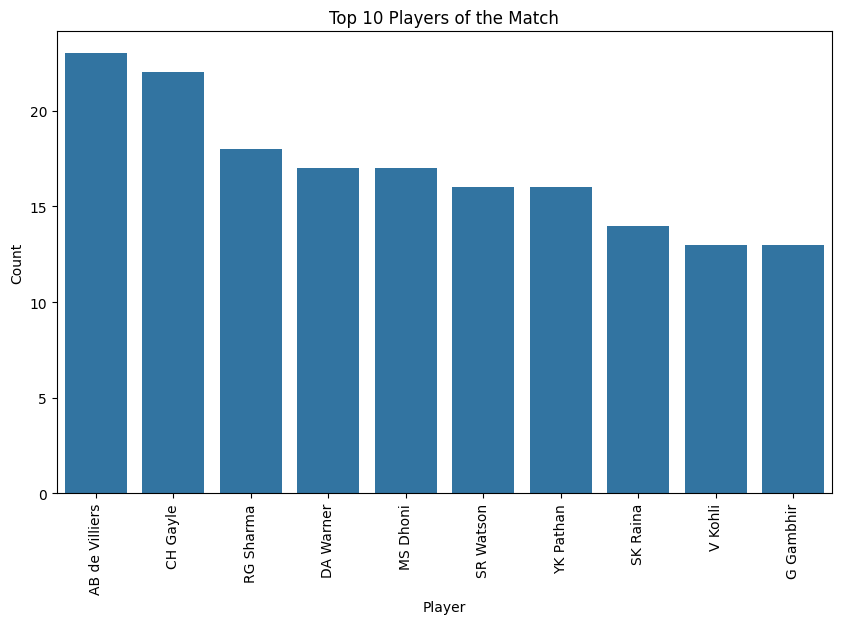

In [ ]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Get the top 10 players with the highest number of "Player of the Match" awards
top_players = data['player_of_match'].value_counts().head(10)

# Use Seaborn's barplot to plot the count of "Player of the Match"
# awards for each of the top 10 players
# The 'x' parameter is set to the player names (index of top_players),
# Dand 'y' is set to the corresponding award counts (values of top_players)
sns.barplot(x=top_players.index, y=top_players.values)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Player')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Players of the Match')

# Display the plot
plt.show()


In [ ]:
# Extracting day, month, and year from the 'date' column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

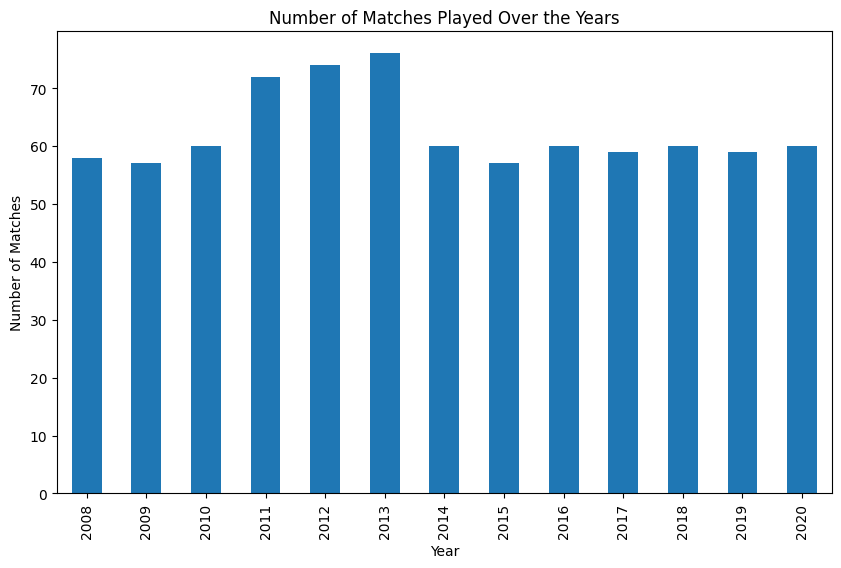

In [ ]:
# Number of matches played over the years
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Years')
plt.show()

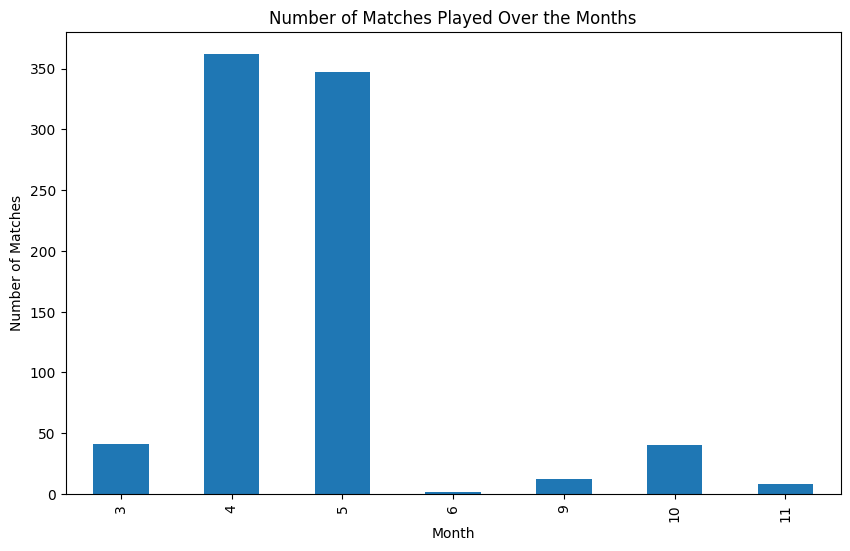

In [ ]:
# Number of matches played over the months
plt.figure(figsize=(10, 6))
data['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Months')
plt.show()

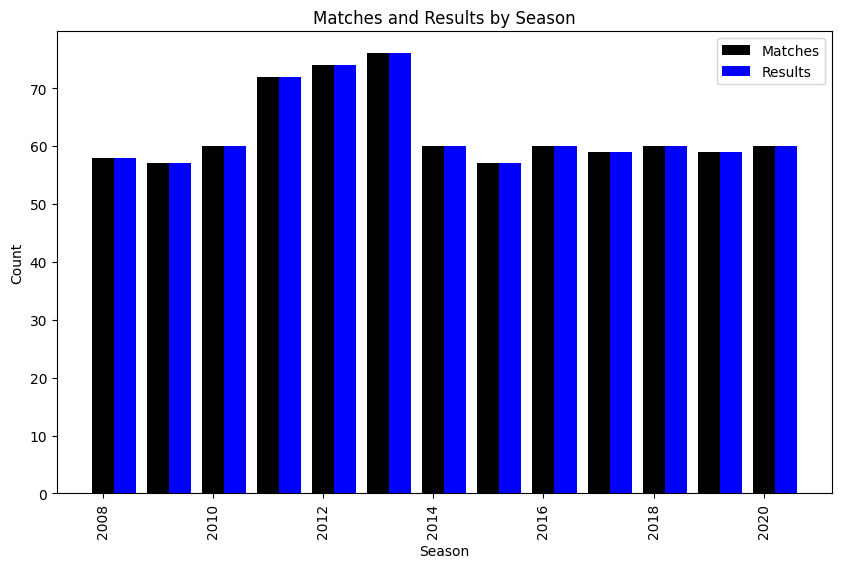

In [ ]:
# Matches and Results by Season
season_matches = data['season'].value_counts()
season_results = data['winner'].groupby(data['season']).value_counts().unstack(fill_value=0)

# Plotting Matches and Results by Season
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(season_matches.index, season_matches.values, width=bar_width, color='black', label='Matches')
plt.bar(season_results.index + bar_width, season_results.values.sum(axis=1), width=bar_width, color='blue', label='Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Matches and Results by Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()


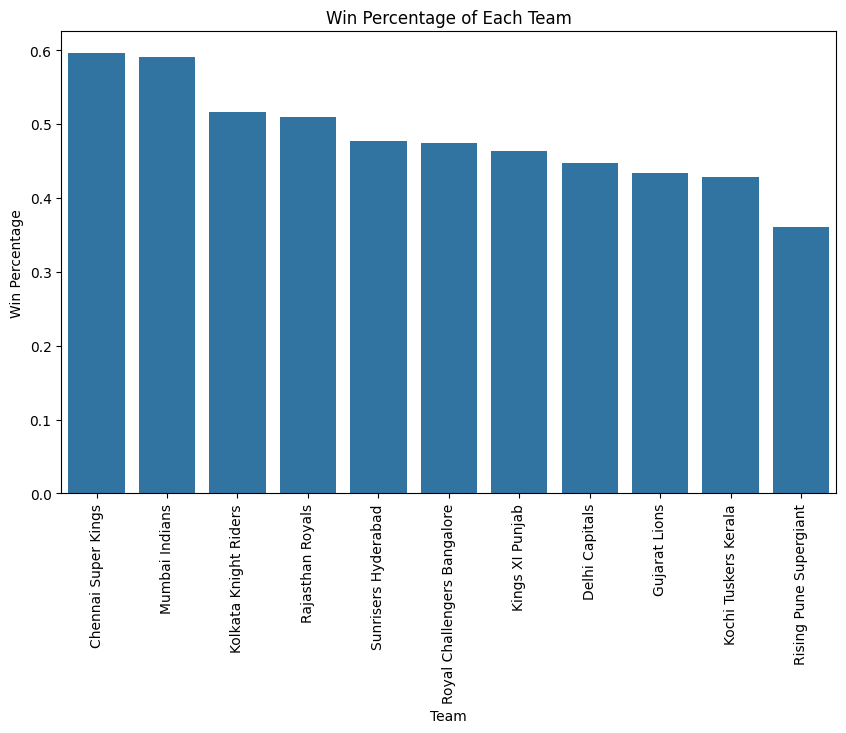

In [ ]:
# Calculate win percentage for each team
team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()


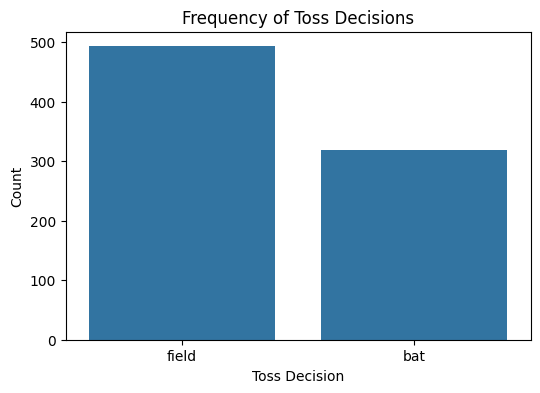

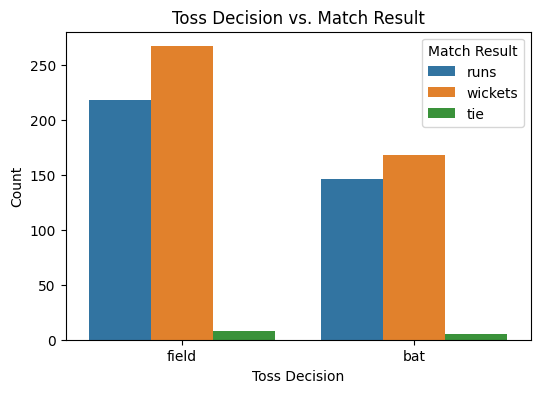

In [ ]:
# Toss Decision Frequency
toss_decision_counts = data['toss_decision'].value_counts()

# Plot the frequency of toss decisions
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Frequency of Toss Decisions')
plt.show()

# Toss Decision vs. Match Result
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', hue='result', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Toss Decision vs. Match Result')
plt.legend(title='Match Result', loc='upper right')
plt.show()


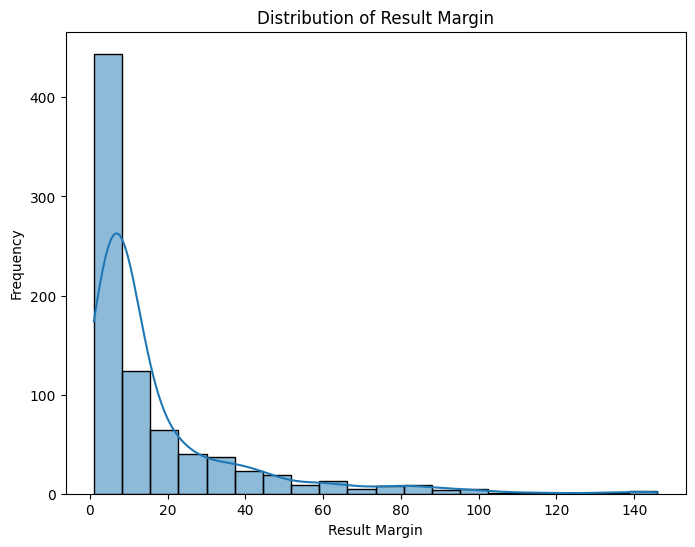

In [ ]:
# Distribution of Result Margin
plt.figure(figsize=(8, 6))
sns.histplot(data['result_margin'], bins=20, kde=True)
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Result Margin')
plt.show()


<ipython-input-49-904e7f5136e9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')


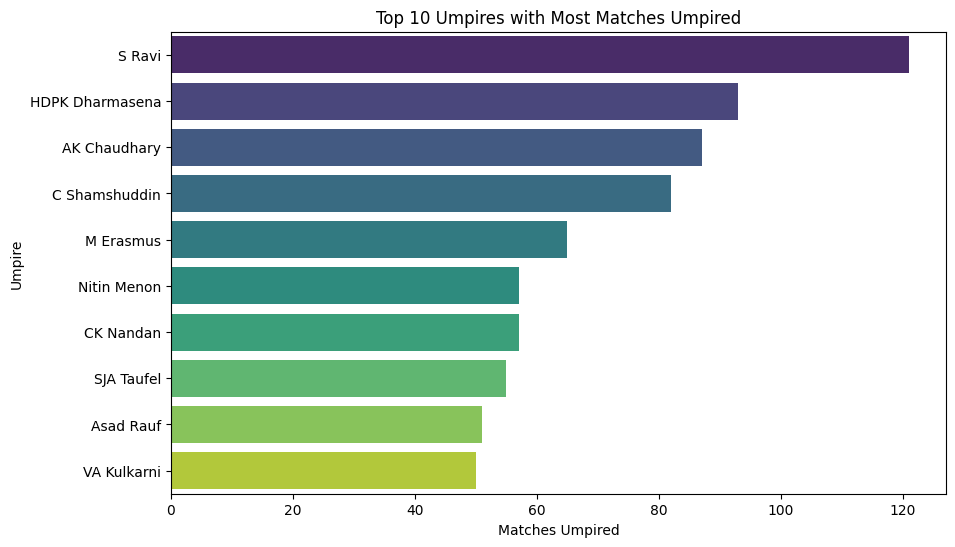

In [ ]:
# Umpire-wise Analysis
umpire1_counts = data['umpire1'].value_counts().reset_index()
umpire1_counts.columns = ['umpire', 'matches_umpired']

umpire2_counts = data['umpire2'].value_counts().reset_index()
umpire2_counts.columns = ['umpire', 'matches_umpired']

# Combine counts from umpire1 and umpire2
umpire_counts = umpire1_counts.merge(umpire2_counts, on='umpire', how='outer')
umpire_counts['matches_umpired'] = umpire_counts['matches_umpired_x'].fillna(0) + umpire_counts['matches_umpired_y'].fillna(0)
umpire_counts = umpire_counts[['umpire', 'matches_umpired']]
umpire_counts = umpire_counts.sort_values(by='matches_umpired', ascending=False).head(10)

# Plotting Umpire-wise Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')
plt.xlabel('Matches Umpired')
plt.ylabel('Umpire')
plt.title('Top 10 Umpires with Most Matches Umpired')
plt.show()


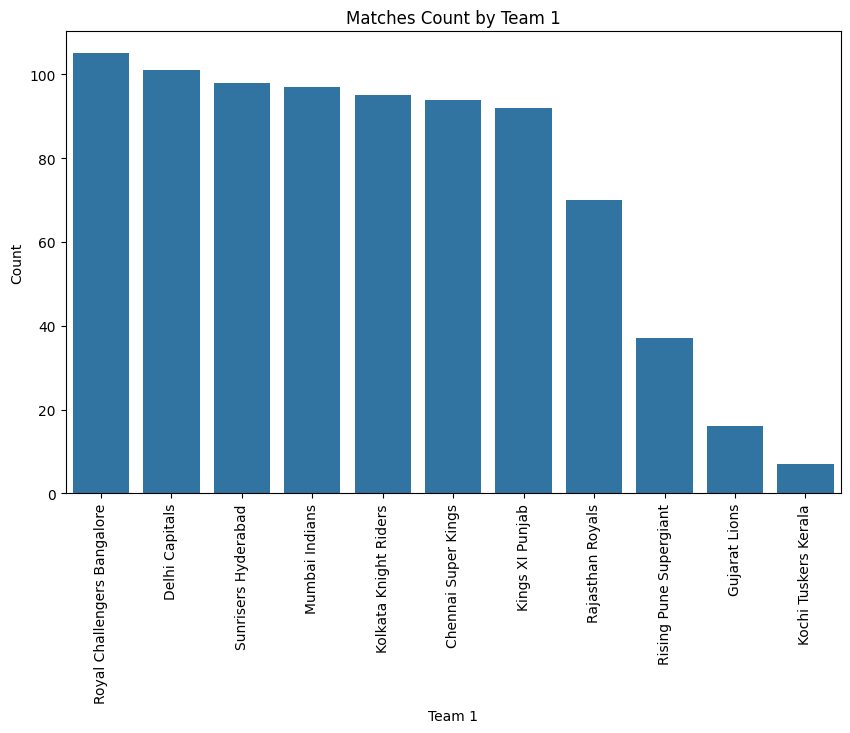

In [ ]:

# Team 1
team1_counts = data['team1'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team1', data=data, order=team1_counts.index)
plt.xlabel('Team 1')
plt.ylabel('Count')
plt.title('Matches Count by Team 1')
plt.xticks(rotation=90)
plt.show()

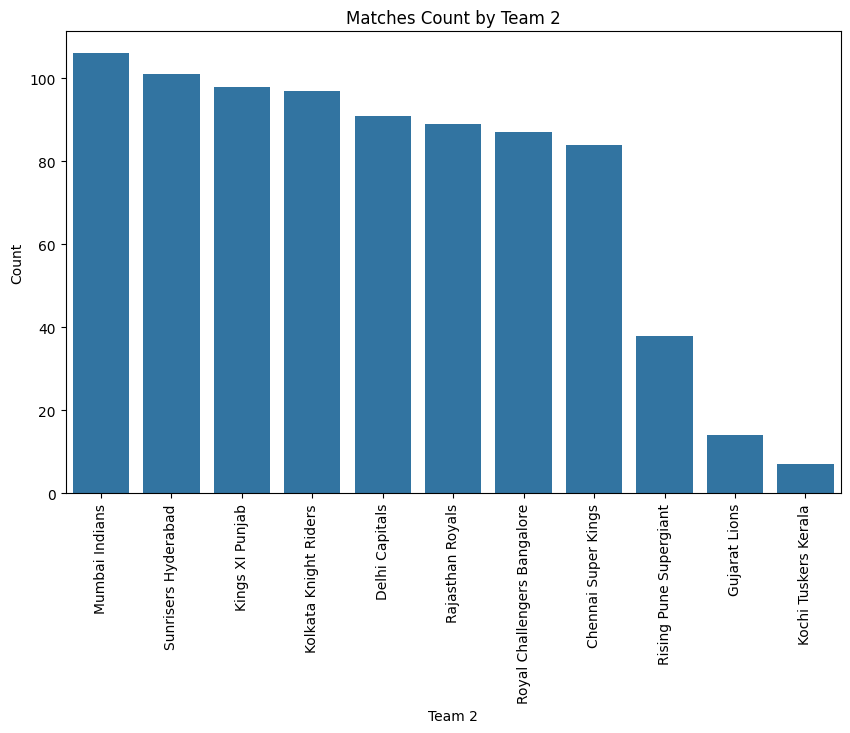

In [ ]:
# Team 2
team2_counts = data['team2'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team2', data=data, order=team2_counts.index)
plt.xlabel('Team 2')
plt.ylabel('Count')
plt.title('Matches Count by Team 2')
plt.xticks(rotation=90)
plt.show()

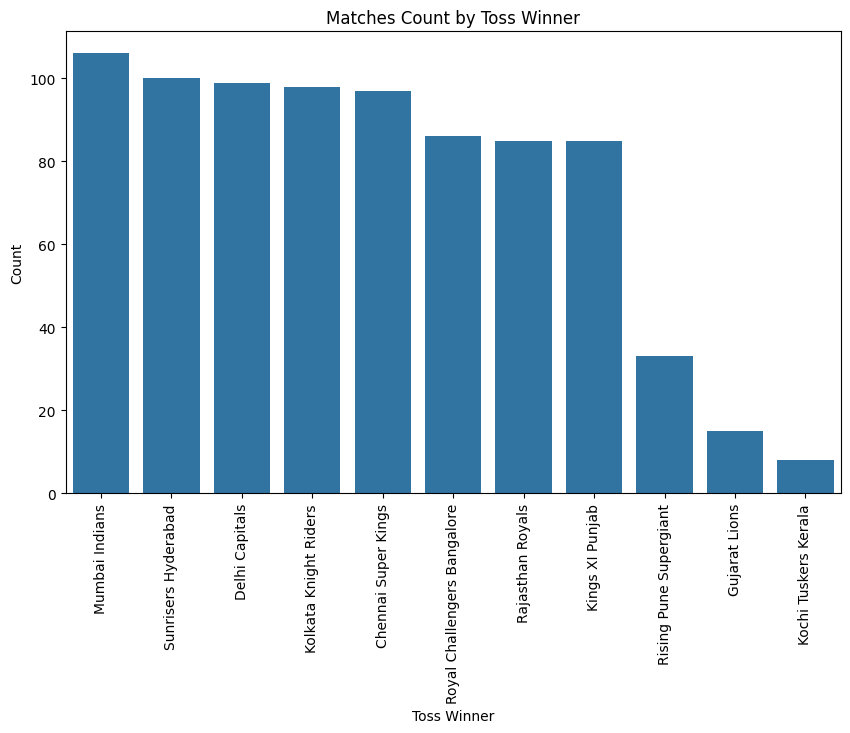

In [ ]:
# Toss Winner
toss_winner_counts = data['toss_winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', data=data, order=toss_winner_counts.index)
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.title('Matches Count by Toss Winner')
plt.xticks(rotation=90)
plt.show()

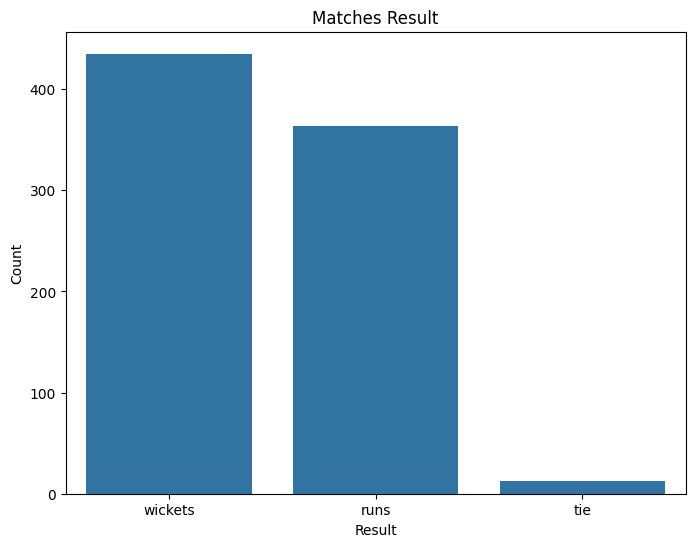

In [ ]:
# Result
result_counts = data['result'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=data, order=result_counts.index)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Matches Result')
plt.show()

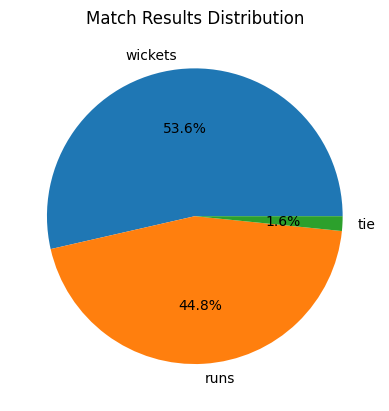

In [ ]:
# Pie Chart
plt.pie(data['result'].value_counts(), labels=data['result'].value_counts().index, autopct='%1.1f%%')
plt.title('Match Results Distribution')
plt.show()

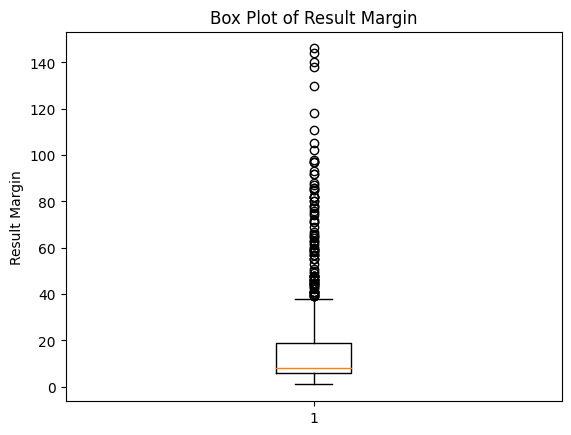

In [ ]:
# Box Plot
plt.boxplot(data['result_margin'])
plt.ylabel('Result Margin')
plt.title('Box Plot of Result Margin')
plt.show()

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])
print(cross_tab)

winner                       Chennai Super Kings  Delhi Capitals  \
team1                                                              
Chennai Super Kings                           65               4   
Delhi Capitals                                 6              50   
Gujarat Lions                                  0               2   
Kings XI Punjab                                6               3   
Kochi Tuskers Kerala                           0               1   
Kolkata Knight Riders                          6               3   
Mumbai Indians                                 4               3   
Rajasthan Royals                               4               3   
Rising Pune Supergiant                         2               3   
Royal Challengers Bangalore                    7               6   
Sunrisers Hyderabad                            6               8   

winner                       Gujarat Lions  Kings XI Punjab  \
team1                                               

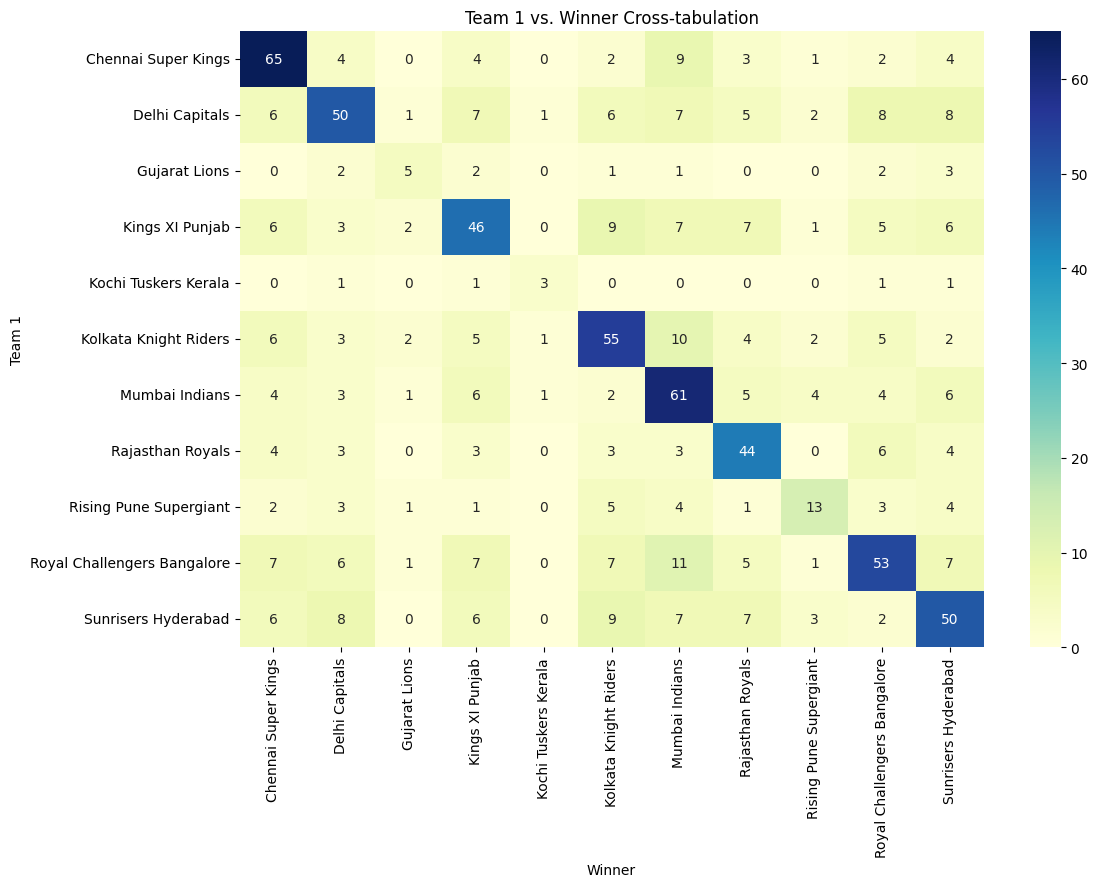

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()


<ipython-input-58-78d49fa66166>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


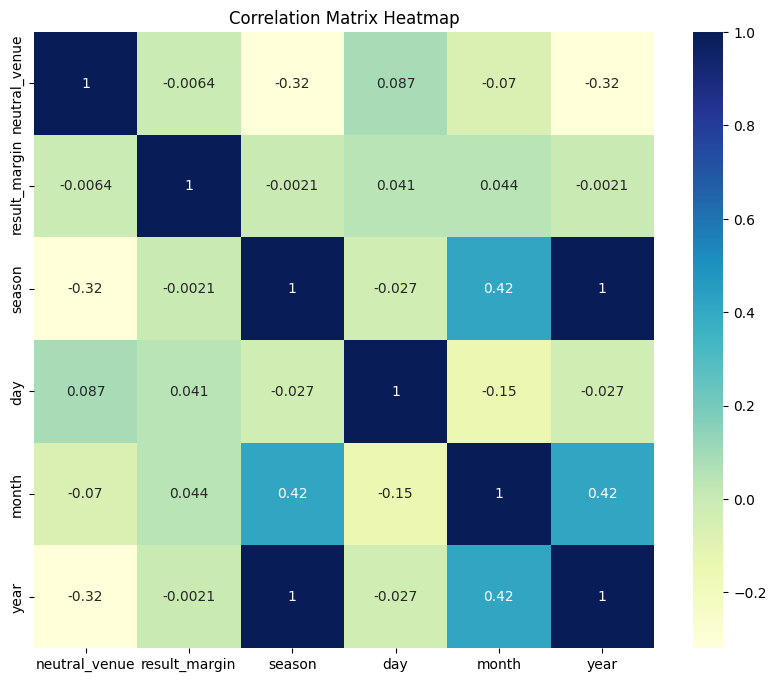

In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Data Preparation**

In [ ]:
# To display the columns of the data
data.columns

Index(['city', 'date', 'player_of_match', 'venue', 'neutral_venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'umpire1', 'umpire2', 'season', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
## Get the unique venues present in the 'winner' column
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Gujarat Lions'],
      dtype=object)

### **Mapping Categorical data into numerical form**
The purpose of this conversion is to transform the categorical data (team names) into numerical form, which is required for many machine learning algorithms that can only handle numerical data. By mapping team names to unique numbers, we can represent them as numerical features in the dataset, enabling us to use them in the model training process.

In [ ]:
# Create a dictionary to map team names to unique numbers
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)



We create a dictionary team_mapping where each team name is mapped to a corresponding unique number. Then, we use the map function in Pandas to replace the team names in the 'team1', 'team2', 'winner', and 'toss_winner' columns with their respective unique numerical values.

In [ ]:
# Get the unique venues present in the 'venue' column
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['venue'] = data['venue'].map(venue_mapping)

In [ ]:
# Get the unique venues present in the 'toss_decsion' column
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [ ]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['toss_decision'] = data['toss_decision'].map(temp)

In [ ]:
# Create a set of unique umpires
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)


In [ ]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [ ]:
# to display our data
data.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season,day,month,year
0,0,2008-04-18,0,0,0,4,1,4,0,1,runs,140.0,N,43,44,2008,18,4,2008
1,1,2008-04-19,1,1,0,6,2,2,1,2,runs,33.0,N,25,5,2008,19,4,2008
2,2,2008-04-19,2,2,0,3,5,5,1,3,wickets,9.0,N,41,52,2008,19,4,2008
3,3,2008-04-20,3,3,0,8,4,8,1,4,wickets,5.0,N,7,45,2008,20,4,2008
4,4,2008-04-20,4,4,0,1,7,7,1,1,wickets,5.0,N,18,2,2008,20,4,2008


In [ ]:
# List of unwanted columns
unwanted_columns = ['date','result','eliminator','season','day','month','year']

# Drop the unwanted columns from the DataFrame
data.drop(columns=unwanted_columns, inplace=True)


In [ ]:
data.head()

,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,0,0,0,0,4,1,4,0,1,140.0,43,44
1,1,1,1,0,6,2,2,1,2,33.0,25,5
2,2,2,2,0,3,5,5,1,3,9.0,41,52
3,3,3,3,0,8,4,8,1,4,5.0,7,45
4,4,4,4,0,1,7,7,1,1,5.0,18,2


<Axes: >

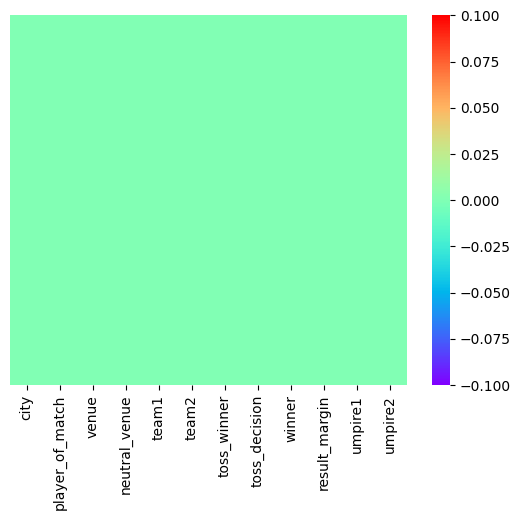

In [ ]:
# checking for the null values in updated dataframe
sns.heatmap(data.isnull(),cmap='rainbow',yticklabels=False)

# **Splitting our data**

In [ ]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (649, 11)
y_train shape: (649,)
X_test shape: (163, 11)
y_test shape: (163,)


# **Identifying Important features**

In [ ]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) city                           0.077514
 2) player_of_match                0.139840
 3) venue                          0.072807
 4) neutral_venue                  0.009727
 5) team1                          0.139148
 6) team2                          0.131324
 7) toss_winner                    0.119880
 8) toss_decision                  0.027038
 9) winner                         0.096558
10) result_margin                  0.093760
11) umpire1                        0.092405


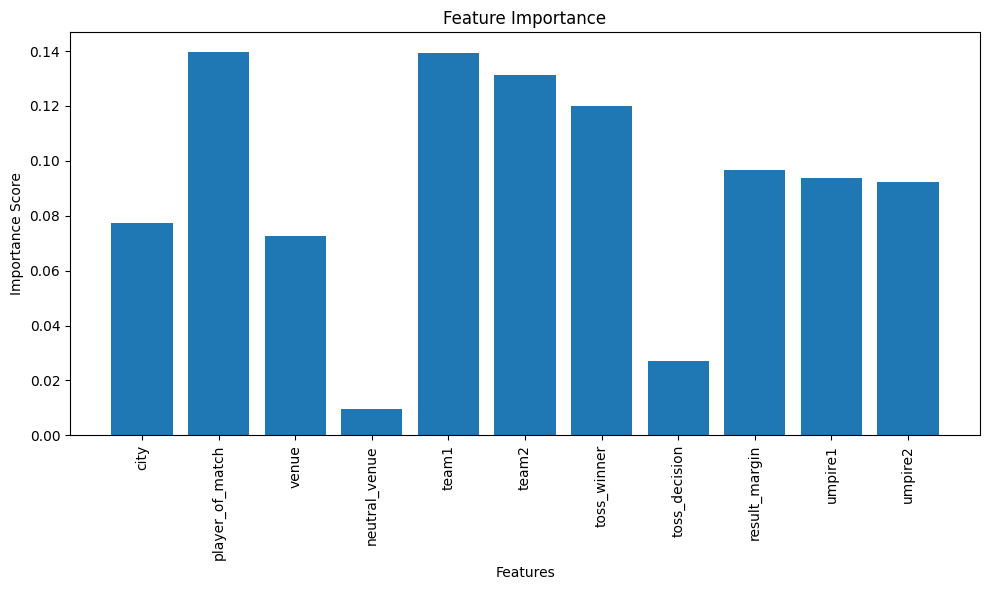

In [ ]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


### **Why we did this feature slection using Random Forest?**

Feature selection using random forest is a popular technique to identify and prioritize important features in a dataset when building predictive models. Random forests are an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting.

The process of feature selection using random forest involves the following steps:

1. Train a Random Forest model: We first train a Random Forest classifier on the training dataset, which consists of input features (X_train) and the target variable (y_train). Random Forests are capable of measuring the importance of each feature in predicting the target variable.

2. Feature Importance Scores: After training the Random Forest model, we can access the feature importance scores using the feature_importances_ attribute of the model. Feature importance scores indicate how much each feature contributes to the prediction task. Higher importance scores mean that a feature has more influence on the model's predictions.

3. Sorting Feature Importance: We sort the feature importance scores in descending order to identify the most important features at the top of the list and the least important ones at the bottom.

4. Visualize the Feature Importance: To better understand the results, we often visualize the feature importance scores using a bar chart. The bar chart helps us identify the most significant features by their relative heights on the chart.

5. Feature Selection: Based on the feature importance scores, we can decide to keep only the most important features in the dataset for model training. This step is essential in reducing the dimensionality of the dataset, which can lead to faster training times and potentially better model performance.

By using Random Forest for feature selection, we can identify the most relevant features, which can be crucial for model interpretability, reducing complexity, and improving the overall performance of the predictive model.

# **Training our Model**

### **1. Logistic Regression**

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2883435582822086


### **2. SVM**

In [ ]:
# Initialize the logistic regression model
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.17177914110429449


### **3. Random Forest**

In [ ]:
# Initialize the logistic regression model
model = RandomForestClassifier(n_estimators=13)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=13)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5398773006134969


### **4. LGBMClassifier**

In [ ]:
# Create an instance of the LGBMClassifier model
model = lgb.LGBMClassifier(
    boosting_type='gbdt',       # The type of boosting algorithm to use ('gbdt': Gradient Boosting Decision Tree)
    num_leaves=31,              # Number of leaves in one tree (default: 31)
    max_depth=-1,               # Maximum tree depth for base learners (-1 means no limit, default: -1)
    learning_rate=0.1,          # Learning rate or shrinkage rate to prevent overfitting (default: 0.1)
    n_estimators=100            # Number of boosting iterations (default: 100)
)

# Fit the model on the training data
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 11
[LightGBM] [Info] Start training from score -2.044616
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.270740
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.285778
[LightGBM] [Info] Start training from score -2.226937
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -3.339939
[LightGBM] [Info] Start training from score -4.865995
[LightGBM] [Info] Start training from score -4.172848
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7116564417177914


# **Buidling a predictive system**

In [ ]:
# Function to get user input for prediction
def get_user_input():
#     City = input("Enter the city: ")
#     Player_of_match = input("Enter the player of the match: ")
#     Venue = input("Enter the venue: ")
#     Neutral_venue = int(input("Is it a neutral venue? (0 for No, 1 for Yes): "))
#     Team1 = input("Enter the first team: ")
#     Team2 = input("Enter the second team: ")
#     Toss_winner = input("Enter the toss winner: ")
#     Toss_decision = input("Enter the toss decision (bat or field): ")
#     Result_margin = float(input("Enter the result margin: "))
#     Umpire1 = input("Enter the name of the first umpire: ")
#     Umpire2 = input("Enter the name of the second umpire: ")

    City = "Bangalore"
    Player_of_match = "BB McCullum"
    Venue = "M Chinnaswamy Stadium"
    Neutral_venue = 0
    Team1 = "Royal Challengers Bangalore"
    Team2 = "Chennai Super Kings"
    Toss_winner = "Royal Challengers Bangalore"
    Toss_decision = "field"
    Result_margin = 4.00
    Umpire1 = "Aleem Dar"
    Umpire2 = "SL Shastri"


    # Display the user input and win probability for Team 1
    print("\n\nUser Input:")
    print(f"City: {City}")
    print(f"Player of the Match: {Player_of_match}")
    print(f"Venue: {Venue}")
    print(f"Neutral Venue: {'Yes' if Neutral_venue == 1 else 'No'}")
    print(f"Team 1: {Team1}")
    print(f"Team 2: {Team2}")
    print(f"Toss Winner: {Toss_winner}")
    print(f"Toss Decision: {Toss_decision}")
    print(f"Umpire1: {Umpire1}")
    print(f"Umpire2: {Umpire2}")
    print("\n")

    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    player_of_match_numeric = player_of_match_mapping.get(Player_of_match, -1)
    venue_numeric = venue_mapping.get(Venue, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)

    user_data = pd.DataFrame({
        'city': [city_numeric],
        'player_of_match': [player_of_match_numeric],
        'venue': [venue_numeric],
        'neutral_venue': [Neutral_venue],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'result_margin': [Result_margin],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data

In [ ]:
# Function to make predictions on user input
def make_predictions(user_data):
    # Make predictions on the user input data
    predictions = model.predict(user_data)

    # Get the probability of winning for the 1st team (team1)
    win_probability_team1 = predictions[0]

    # Convert probability to percentage
    win_probability_percentage_team1 = win_probability_team1 * 10

    return win_probability_percentage_team1

In [ ]:
# Main function to run the predictive system
def main():
    print("Welcome to the IPL Match Winner Predictor!")

    #while True:
    user_data = get_user_input()
    win_probability_team1 = make_predictions(user_data)

    # Display the win probability for the 1st team (team1)
    print(f"Win Probability for Team 1: {win_probability_team1:.2f}%")
    win_probability_team2 = 100-win_probability_team1
    print(f"Win Probability for Team 2: {win_probability_team2:.2f}%")

        # Ask if the user wants to make another prediction
#         another_prediction = input("\n\nDo you want to make another prediction? (yes or no): ")
#         if another_prediction.lower() != 'yes':
#             break

    print("\n\nThank you for using the IPL Match Winner Predictor!")

if __name__ == "__main__":
    main()